#🛠️ Preparación de los Datos

##Descripción del caso

El siguiente set de datos corresponde a un servicio de señal inalámbrica que es contartado para los viajes en tren. Se busca determinar si el cliente renunciará o no de acuerdo a a las condiciones del servicio. Los cantidad de datos es de 2,15 Millones de clientes aproximadamente

##Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,RocCurveDisplay
import pickle
from sklearn.model_selection import StratifiedKFold,cross_validate,KFold



##Extración y revisión de datos

In [4]:
df=pd.read_csv('/content/Train.csv', encoding='utf-8')
df.head()


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


###Explorando datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
df.CHURN.value_counts(normalize=True)

,proportion
CHURN,
0,0.812453
1,0.187547


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [8]:
df[df.CHURN==0].describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1327395.0,5703.556610,7189.540843,10.0,1100.0,3250.0,7500.0,470000.0
FREQUENCE_RECH,1327395.0,11.905164,13.431445,1.0,3.0,7.0,16.0,133.0
REVENUE,1350807.0,5706.809092,7271.586647,1.0,1002.0,3200.0,7600.0,532177.0
ARPU_SEGMENT,1350807.0,1902.275791,2423.857757,0.0,334.0,1067.0,2533.0,177392.0
FREQUENCE,1350807.0,14.467675,14.848850,1.0,4.0,9.0,20.0,91.0
DATA_VOLUME,1013755.0,3487.519452,13335.087929,0.0,0.0,286.0,3114.0,1823866.0
ON_NET,1296264.0,289.686780,891.339727,0.0,5.0,30.0,169.0,50809.0
ORANGE,1207882.0,98.087055,207.910791,0.0,8.0,30.0,103.0,21323.0
TIGO,837438.0,23.513369,64.220141,0.0,2.0,6.0,21.0,4174.0
ZONE1,162116.0,8.083422,41.202052,0.0,0.0,1.0,3.0,4792.0


In [9]:
df[df.CHURN==1].describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,69914.0,2277.145407,4264.440318,20.0,500.0,1000.0,2500.0,286500.0
FREQUENCE_RECH,69914.0,4.389507,6.538209,1.0,1.0,2.0,5.0,91.0
REVENUE,77193.0,2081.011076,4224.456241,1.0,205.0,826.0,2225.0,323541.0
ARPU_SEGMENT,77193.0,693.676849,1408.150099,0.0,68.0,275.0,742.0,107847.0
FREQUENCE,77193.0,5.411760,7.635689,1.0,1.0,2.0,6.0,88.0
DATA_VOLUME,79860.0,1829.578224,12810.412758,0.0,0.0,75.0,1024.0,1238915.0
ON_NET,71109.0,58.981128,333.733171,0.0,1.0,5.0,15.0,12912.0
ORANGE,50918.0,32.119977,95.963433,0.0,2.0,9.0,26.0,5283.0
TIGO,26594.0,10.383733,35.934686,0.0,1.0,3.0,9.0,2056.0
ZONE1,7605.0,10.018540,40.428059,0.0,0.0,1.0,4.0,894.0


###Datos único

In [10]:
for c in df.columns:
  print(f'{c}={df[c].nunique()}')
  print(f'{df[c].unique()}')

user_id=2154048
['00000bfd7d50f01092811bc0c8d7b0d6fe7c3596'
 '00000cb4a5d760de88fecb38e2f71b7bec52e834'
 '00001654a9d9f96303d9969d0a4a851714a4bb57' ...
 'fffff172fda1b4bb38a95385951908bb92379809'
 'fffff5911296937a37f09a37a549da2e0dad6dbb'
 'fffff6dbff1508ea2bfe814e5ab2729ce6b788c2']
REGION=14
['FATICK' nan 'DAKAR' 'LOUGA' 'TAMBACOUNDA' 'KAOLACK' 'THIES'
 'SAINT-LOUIS' 'KOLDA' 'KAFFRINE' 'DIOURBEL' 'ZIGUINCHOR' 'MATAM'
 'SEDHIOU' 'KEDOUGOU']
TENURE=8
['K > 24 month' 'I 18-21 month' 'G 12-15 month' 'H 15-18 month'
 'J 21-24 month' 'F 9-12 month' 'D 3-6 month' 'E 6-9 month']
MONTANT=6540
[  4250.     nan   3600. ...   8046.  18770. 145500.]
FREQUENCE_RECH=123
[ 15.  nan   2.   1.  17.  16.   3.   8.  27.   7.  24.  46.  22.  14.
  12.   4.  66.  25.  43.  63.   9.  10.  11.  19.   6.  37.  73.  32.
  48.  29.  13.  30.  40.   5.  31.  20.  21.  18.  28.  26.  41.  23.
  47.  53.  34.  61.  45.  33.  38.  70.  42.  50.  57.  55.  44.  65.
  72.  35.  59.  49.  62.  69.  77.  39.  36.  51.

###Datos Nulos

In [11]:
for c in df.columns:
  print(f'{c}-->Total={df[c].count()} --Nan={df[c].isna().sum()} --Null={df[c].isnull().sum()}')



user_id-->Total=2154048 --Nan=0 --Null=0
REGION-->Total=1304749 --Nan=849299 --Null=849299
TENURE-->Total=2154048 --Nan=0 --Null=0
MONTANT-->Total=1397309 --Nan=756739 --Null=756739
FREQUENCE_RECH-->Total=1397309 --Nan=756739 --Null=756739
REVENUE-->Total=1428000 --Nan=726048 --Null=726048
ARPU_SEGMENT-->Total=1428000 --Nan=726048 --Null=726048
FREQUENCE-->Total=1428000 --Nan=726048 --Null=726048
DATA_VOLUME-->Total=1093615 --Nan=1060433 --Null=1060433
ON_NET-->Total=1367373 --Nan=786675 --Null=786675
ORANGE-->Total=1258800 --Nan=895248 --Null=895248
TIGO-->Total=864032 --Nan=1290016 --Null=1290016
ZONE1-->Total=169721 --Nan=1984327 --Null=1984327
ZONE2-->Total=136824 --Nan=2017224 --Null=2017224
MRG-->Total=2154048 --Nan=0 --Null=0
REGULARITY-->Total=2154048 --Nan=0 --Null=0
TOP_PACK-->Total=1251454 --Nan=902594 --Null=902594
FREQ_TOP_PACK-->Total=1251454 --Nan=902594 --Null=902594
CHURN-->Total=2154048 --Nan=0 --Null=0


In [12]:
dfN0=df[df.CHURN==0]
for c in dfN0.columns:
  print(f'{c}-->Total={dfN0[c].count()} --Nan={dfN0[c].isna().sum()}  ')

user_id-->Total=1750062 --Nan=0  
REGION-->Total=1281238 --Nan=468824  
TENURE-->Total=1750062 --Nan=0  
MONTANT-->Total=1327395 --Nan=422667  
FREQUENCE_RECH-->Total=1327395 --Nan=422667  
REVENUE-->Total=1350807 --Nan=399255  
ARPU_SEGMENT-->Total=1350807 --Nan=399255  
FREQUENCE-->Total=1350807 --Nan=399255  
DATA_VOLUME-->Total=1013755 --Nan=736307  
ON_NET-->Total=1296264 --Nan=453798  
ORANGE-->Total=1207882 --Nan=542180  
TIGO-->Total=837438 --Nan=912624  
ZONE1-->Total=162116 --Nan=1587946  
ZONE2-->Total=129513 --Nan=1620549  
MRG-->Total=1750062 --Nan=0  
REGULARITY-->Total=1750062 --Nan=0  
TOP_PACK-->Total=1201194 --Nan=548868  
FREQ_TOP_PACK-->Total=1201194 --Nan=548868  
CHURN-->Total=1750062 --Nan=0  


In [13]:
dfN1=df[df.CHURN==1]
for c in dfN0.columns:
  print(f'{c}-->Total={dfN1[c].count()} --Nan={dfN1[c].isna().sum()} ')

user_id-->Total=403986 --Nan=0 
REGION-->Total=23511 --Nan=380475 
TENURE-->Total=403986 --Nan=0 
MONTANT-->Total=69914 --Nan=334072 
FREQUENCE_RECH-->Total=69914 --Nan=334072 
REVENUE-->Total=77193 --Nan=326793 
ARPU_SEGMENT-->Total=77193 --Nan=326793 
FREQUENCE-->Total=77193 --Nan=326793 
DATA_VOLUME-->Total=79860 --Nan=324126 
ON_NET-->Total=71109 --Nan=332877 
ORANGE-->Total=50918 --Nan=353068 
TIGO-->Total=26594 --Nan=377392 
ZONE1-->Total=7605 --Nan=396381 
ZONE2-->Total=7311 --Nan=396675 
MRG-->Total=403986 --Nan=0 
REGULARITY-->Total=403986 --Nan=0 
TOP_PACK-->Total=50260 --Nan=353726 
FREQ_TOP_PACK-->Total=50260 --Nan=353726 
CHURN-->Total=403986 --Nan=0 


###Chequeo de columnas categóricas

In [14]:
tenure_frec=df.TENURE.value_counts(normalize=True)
tenure_frec

,proportion
TENURE,
K > 24 month,0.948540
I 18-21 month,0.021020
H 15-18 month,0.012073
G 12-15 month,0.006918
J 21-24 month,0.005907
F 9-12 month,0.004330
E 6-9 month,0.000854
D 3-6 month,0.000357


In [15]:
region_frec=df.REGION.value_counts(normalize=True)
region_frec

,proportion
REGION,
DAKAR,0.393387
THIES,0.137997
SAINT-LOUIS,0.091884
LOUGA,0.075917
KAOLACK,0.074333
DIOURBEL,0.051283
TAMBACOUNDA,0.042210
KAFFRINE,0.033695
KOLDA,0.029694


In [16]:
toppack_frec=df.TOP_PACK.value_counts(normalize=True)
toppack_frec

,proportion
TOP_PACK,
All-net 500F=2000F;5d,2.539462e-01
On net 200F=Unlimited _call24H,1.216944e-01
"Data:490F=1GB,7d",9.203694e-02
"Data: 100 F=40MB,24H",6.764052e-02
Mixt 250F=Unlimited_call24H,5.394685e-02
...,...
Data_Mifi_20Go,7.990705e-07
APANews_monthly,7.990705e-07
NEW_CLIR_TEMPRESTRICTED_LIBERTE_MOBILE,7.990705e-07


##Elimina columnas irrelevantes

In [17]:
df=df.drop(['ZONE1','ZONE2','MRG','TOP_PACK'],axis=1)

##Reemplazando NAN

In [18]:
region_frec=df.REGION.value_counts().to_dict()
region_frec

{'DAKAR': 513271,
 'THIES': 180052,
 'SAINT-LOUIS': 119886,
 'LOUGA': 99053,
 'KAOLACK': 96986,
 'DIOURBEL': 66911,
 'TAMBACOUNDA': 55074,
 'KAFFRINE': 43963,
 'KOLDA': 38743,
 'FATICK': 35643,
 'MATAM': 29083,
 'ZIGUINCHOR': 21945,
 'SEDHIOU': 3119,
 'KEDOUGOU': 1020}

In [19]:
df['REGION'] = df['REGION'].map(region_frec)


In [20]:
df['REGION'] = df['REGION'].fillna(region_frec['DAKAR'])

In [21]:
grupo=tenure_frec[tenure_frec<0.05].index
df.TENURE=df.TENURE.replace(grupo,0)
df.TENURE=df.TENURE.replace('K > 24 month',1)


/tmp/ipython-input-3207878496.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.TENURE=df.TENURE.replace('K > 24 month',1)


In [22]:
df.DATA_VOLUME=df.DATA_VOLUME.replace(np.nan,0)

In [23]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,35643.0,1,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,54,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,513271.0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,513271.0,1,3600.0,2.0,1020.0,340.0,2.0,0.0,90.0,46.0,7.0,17,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,513271.0,1,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,513271.0,1,1000.0,1.0,985.0,328.0,1.0,0.0,39.0,24.0,NaN,11,2.0,0


In [24]:
col=['MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','ON_NET','ORANGE','TIGO','REGULARITY','FREQ_TOP_PACK']

In [25]:
for c in col:
  frech_0=df[c][df.CHURN==0].mean().round(1)
  frech_1=df[c][df.CHURN==1].mean().round(1)

  df.loc[(df['CHURN'] == 0) & (df[c].isna()), c] = frech_0
  df.loc[(df['CHURN'] == 1) & (df[c].isna()), c] = frech_1

/tmp/ipython-input-3986251571.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['CHURN'] == 0) & (df[c].isna()), c] = frech_0


In [26]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,35643.0,1,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,54.0,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,513271.0,0,2277.1,4.4,2081.0,693.7,5.4,0.0,59.0,32.1,10.4,4.0,4.2,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,513271.0,1,3600.0,2.0,1020.0,340.0,2.0,0.0,90.0,46.0,7.0,17.0,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,513271.0,1,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,62.0,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,513271.0,1,1000.0,1.0,985.0,328.0,1.0,0.0,39.0,24.0,23.5,11.0,2.0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          float64
 2   TENURE          int64  
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  REGULARITY      float64
 13  FREQ_TOP_PACK   float64
 14  CHURN           int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 246.5+ MB


In [28]:
for c in df.columns:
  print(f'{c}-->Total={df[c].count()} --Nan={df[c].isna().sum()} ')

user_id-->Total=2154048 --Nan=0 
REGION-->Total=2154048 --Nan=0 
TENURE-->Total=2154048 --Nan=0 
MONTANT-->Total=2154048 --Nan=0 
FREQUENCE_RECH-->Total=2154048 --Nan=0 
REVENUE-->Total=2154048 --Nan=0 
ARPU_SEGMENT-->Total=2154048 --Nan=0 
FREQUENCE-->Total=2154048 --Nan=0 
DATA_VOLUME-->Total=2154048 --Nan=0 
ON_NET-->Total=2154048 --Nan=0 
ORANGE-->Total=2154048 --Nan=0 
TIGO-->Total=2154048 --Nan=0 
REGULARITY-->Total=2154048 --Nan=0 
FREQ_TOP_PACK-->Total=2154048 --Nan=0 
CHURN-->Total=2154048 --Nan=0 


###Guardando datos limpios

In [29]:
df.to_csv("df.csv", index=False)

#📊 Análisis

##Extrayendo datos limpios

In [3]:
#Directo desde datos guardados
#datos=pd.read_csv('/content/df.csv')
#df_id=datos["user_id"]
#datos=datos.drop(["user_id"],axis=1)


In [31]:
df1=df.copy()

datos=df1.drop(["user_id"],axis=1)
df_id=df1["user_id"]


##Normalización de datos  (KNN y Regresión Logística)

In [32]:
from sklearn.preprocessing import MinMaxScaler
normalizacion=MinMaxScaler()
columnas=datos.columns
datos_norm=normalizacion.fit_transform(datos)
datos_norm=pd.DataFrame(datos_norm,columns=columnas)
datos_norm.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,0.06759,1.0,0.009021,0.106061,0.007986,0.007988,0.177778,0.000002,0.007636,0.002157,0.000240,0.868852,0.009831,0.0
1,1.00000,0.0,0.004824,0.025758,0.003908,0.003911,0.048889,0.000000,0.001161,0.001505,0.002492,0.049180,0.004494,1.0
2,1.00000,1.0,0.007638,0.007576,0.001915,0.001917,0.011111,0.000000,0.001771,0.002157,0.001677,0.262295,0.000000,0.0
3,1.00000,1.0,0.028703,0.106061,0.025369,0.025373,0.188889,0.024017,0.000807,0.004784,0.000479,1.000000,0.014045,0.0
4,1.00000,1.0,0.002106,0.000000,0.001849,0.001849,0.000000,0.000000,0.000768,0.001126,0.005630,0.163934,0.001404,0.0


##Correlación

In [33]:
df_corr=datos.corr()
df_corr

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
REGION,1.000000,-0.022352,-0.026873,-0.057412,-0.030297,-0.030296,-0.060578,0.038525,-0.098526,-0.040676,-0.032354,-0.317465,-0.043946,0.328260
TENURE,-0.022352,1.000000,0.018638,0.011440,0.019363,0.019363,0.011096,-0.009144,0.008657,0.021142,0.012077,0.031298,0.013027,-0.047414
MONTANT,-0.026873,0.018638,1.000000,0.802265,0.965214,0.965214,0.776707,0.250361,0.333442,0.638830,0.377976,0.448093,0.724079,-0.228604
FREQUENCE_RECH,-0.057412,0.011440,0.802265,1.000000,0.800402,0.800401,0.946029,0.152330,0.406816,0.511447,0.314659,0.483908,0.847048,-0.266195
REVENUE,-0.030297,0.019363,0.965214,0.800402,1.000000,1.000000,0.796169,0.259922,0.338189,0.642338,0.377636,0.462117,0.732684,-0.236543
ARPU_SEGMENT,-0.030296,0.019363,0.965214,0.800401,1.000000,1.000000,0.796168,0.259922,0.338188,0.642338,0.377636,0.462113,0.732683,-0.236540
FREQUENCE,-0.060578,0.011096,0.776707,0.946029,0.796169,0.796168,1.000000,0.168448,0.395567,0.466906,0.280184,0.517604,0.818565,-0.286412
DATA_VOLUME,0.038525,-0.009144,0.250361,0.152330,0.259922,0.259922,0.168448,1.000000,0.004243,0.042400,0.019189,0.193606,0.111629,-0.067242
ON_NET,-0.098526,0.008657,0.333442,0.406816,0.338189,0.338188,0.395567,0.004243,1.000000,0.230065,0.139512,0.237817,0.362176,-0.128659
ORANGE,-0.040676,0.021142,0.638830,0.511447,0.642338,0.642338,0.466906,0.042400,0.230065,1.000000,0.394999,0.265121,0.544028,-0.162520


In [34]:
#Correlación con la Evasión
datos_corr_evasion=datos.corr()['CHURN'].sort_values(ascending=False)
datos_corr_evasion

,CHURN
CHURN,1.000000
REGION,0.328260
TENURE,-0.047414
DATA_VOLUME,-0.067242
TIGO,-0.126131
ON_NET,-0.128659
ORANGE,-0.162520
FREQ_TOP_PACK,-0.216374
MONTANT,-0.228604
ARPU_SEGMENT,-0.236540


####Observaciones: En general los datos presentan una correlación mayor al 10% con excepción de TENURE y DATA_VOLUME

##VIF (variance inflation factor)

In [35]:
from statsmodels.tools.tools import add_constant
X_normalizado=datos_norm.drop('CHURN',axis=1)
y_normalizado=datos_norm['CHURN']
X_const=add_constant(X_normalizado)
X_const

,const,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,1.0,0.067590,1.0,0.009021,0.106061,0.007986,0.007988,0.177778,0.000002,0.007636,0.002157,0.000240,0.868852,0.009831
1,1.0,1.000000,0.0,0.004824,0.025758,0.003908,0.003911,0.048889,0.000000,0.001161,0.001505,0.002492,0.049180,0.004494
2,1.0,1.000000,1.0,0.007638,0.007576,0.001915,0.001917,0.011111,0.000000,0.001771,0.002157,0.001677,0.262295,0.000000
3,1.0,1.000000,1.0,0.028703,0.106061,0.025369,0.025373,0.188889,0.024017,0.000807,0.004784,0.000479,1.000000,0.014045
4,1.0,1.000000,1.0,0.002106,0.000000,0.001849,0.001849,0.000000,0.000000,0.000768,0.001126,0.005630,0.163934,0.001404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,1.0,1.000000,1.0,0.012114,0.082576,0.010722,0.010724,0.150000,0.000000,0.005702,0.004601,0.005630,0.081967,0.011938
2154044,1.0,0.349501,1.0,0.012958,0.106061,0.010897,0.010897,0.155556,0.000340,0.000512,0.001876,0.009583,0.885246,0.011236
2154045,1.0,1.000000,1.0,0.004824,0.025758,0.003908,0.003911,0.048889,0.000000,0.001161,0.001505,0.002492,0.000000,0.004494
2154046,1.0,0.349501,1.0,0.021256,0.075758,0.013377,0.013377,0.133333,0.000000,0.000000,0.006566,0.003115,0.442623,0.015449


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
columnas=X_const.columns
VIF1=pd.DataFrame()
VIF1['Variables']=columnas
VIF1['VIF']=[variance_inflation_factor(X_const[columnas],i) for i in range(len(columnas))]
VIF1.sort_values(by='VIF',ascending=False)

,Variables,VIF
5,REVENUE,7.885649e+07
6,ARPU_SEGMENT,7.885552e+07
0,const,2.900557e+01
3,MONTANT,1.600227e+01
4,FREQUENCE_RECH,1.258706e+01
7,FREQUENCE,1.125622e+01
13,FREQ_TOP_PACK,3.939155e+00
10,ORANGE,1.943158e+00
12,REGULARITY,1.623290e+00
11,TIGO,1.243853e+00


####Observacion: Aquí REVENUE y ARPU_SEGMENT son los valores probables a descartar por tener un VIF muy alto

##Modelos

###Separación de datos

In [4]:
X=datos.drop('CHURN',axis=1)
y=datos['CHURN']

In [5]:
#from sklearn.model_selection import train_test_split

X_ent,X_test,y_ent,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_ent,y_ent,test_size=0.1,random_state=5,stratify=y_ent)

###Balanceo de datos

####Balanceo de datos Over

In [39]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(random_state=5,sampling_strategy=0.5)

X_bal_over,y_bal_over=oversample.fit_resample(X_ent,y_ent)


In [40]:
len(X_bal_over)

2100073

In [41]:
x_bal_over=pd.DataFrame(X_bal_over,columns=X.columns)
y_bal_over=pd.DataFrame(y_bal_over,columns=['CHURN'])

In [42]:
x_bal_over.to_csv("x_bal_over.csv", index=False)
y_bal_over.to_csv("y_bal_over.csv", index=False)

####Balanceo de datos Under

In [6]:
from imblearn.under_sampling import NearMiss
undersample=NearMiss(version=3)
X_bal_under,y_bal_under=undersample.fit_resample(X_ent,y_ent)
#X_test_under,y_test_under=undersample.fit_resample(X_test,y_test)

/usr/local/lib/python3.12/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [7]:
x_bal_under=pd.DataFrame(X_bal_under,columns=X.columns)
y_bal_under=pd.DataFrame(y_bal_under,columns=['CHURN'])

In [8]:
x_bal_under.to_csv("x_bal_under.csv", index=False)
y_bal_under.to_csv("y_bal_under.csv", index=False)

In [50]:
len(X_bal_under)

405997

###Métricas

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calcular_metricas(y_test,y_pred):

  metricas = {'accuracy':round(accuracy_score(y_test,y_pred),2),
              'recall':round(recall_score(y_test,y_pred),2),
              'precision':round(precision_score(y_test,y_pred),2),
               'f1':round(f1_score(y_test,y_pred),2)
                }
  return metricas

In [52]:
print(f' X --> {len(X_ent+X_test)}')
print(f'X_ent -->{len(X_ent)}')
print(f'X_test --> {len(X_test)}')
print(f'X_val --> {len(X_val)}')

 X --> 2154048
X_ent -->1723238
X_test --> 430810
X_val --> 172324


###Random Forest

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,RocCurveDisplay

In [53]:

from sklearn.ensemble import RandomForestClassifier
modelo_RF=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=5)
modelo_RF.fit(X_train,y_train)
y_previsto_rf=modelo_RF.predict(X_val)



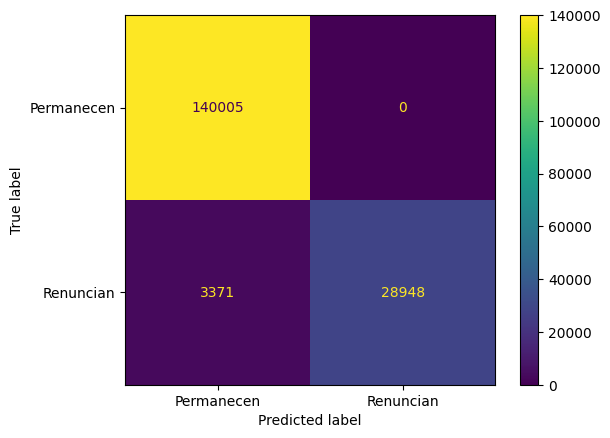

In [54]:
matriz_confusion=confusion_matrix(y_val,y_previsto_rf)
matriz_confusion

visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

In [55]:
print(classification_report(y_val,y_previsto_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    140005
           1       1.00      0.90      0.94     32319

    accuracy                           0.98    172324
   macro avg       0.99      0.95      0.97    172324
weighted avg       0.98      0.98      0.98    172324



In [56]:
calcular_metricas(y_val,y_previsto_rf)

{'accuracy': 0.98, 'recall': 0.9, 'precision': 1.0, 'f1': 0.94}

In [60]:
RF=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=5)
cv=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(RF,X_ent,y_ent,cv=cv,scoring='recall')
cv_resultados

{'fit_time': array([90.27974153, 91.42952538, 87.88295341, 90.15849614, 91.18760347]),
 'score_time': array([1.48032451, 1.55660677, 1.74265599, 1.53129578, 1.49450707]),
 'test_score': array([0.89239275, 0.89300815, 0.89417489, 0.89194578, 0.89189647])}

####RF con balanceo Over

In [61]:
from sklearn.ensemble import RandomForestClassifier
modelo_RF_bo=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=5)
modelo_RF_bo.fit(X_bal_over,y_bal_over)
y_previsto_rf_bo=modelo_RF_bo.predict(X_val)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


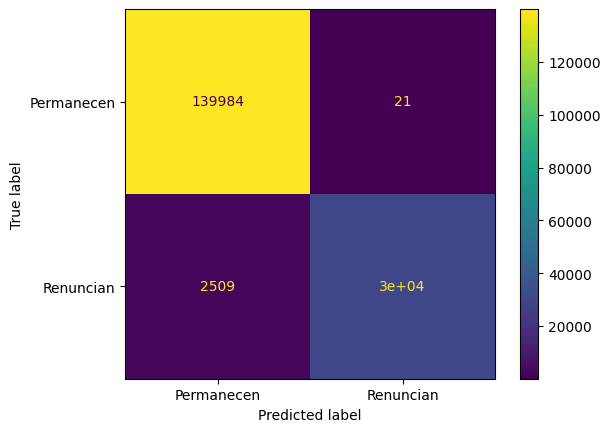

In [62]:
matriz_confusion=confusion_matrix(y_val,y_previsto_rf_bo)
matriz_confusion

visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

In [63]:
print(classification_report(y_val,y_previsto_rf_bo))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    140005
           1       1.00      0.92      0.96     32319

    accuracy                           0.99    172324
   macro avg       0.99      0.96      0.98    172324
weighted avg       0.99      0.99      0.99    172324



In [64]:
RF=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=5)
cv=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(RF,X_bal_over,y_bal_over,cv=cv,scoring='recall')
cv_resultados

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

{'fit_time': array([110.01188636, 106.95263529, 108.60259318, 107.79791498,
        120.47445035]),
 'score_time': array([1.66856384, 1.69031096, 1.52393436, 1.68618059, 1.6921978 ]),
 'test_score': array([0.92070825, 0.92205919, 0.92004796, 0.9199056 , 0.92091991])}

####RF con balanceo Under

In [9]:
from sklearn.ensemble import RandomForestClassifier
modelo_RF_bu=RandomForestClassifier(max_depth = 5,random_state=5)
modelo_RF_bu.fit(X_bal_under,y_bal_under)
y_previsto_rf_bu=modelo_RF_bu.predict(X_val)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


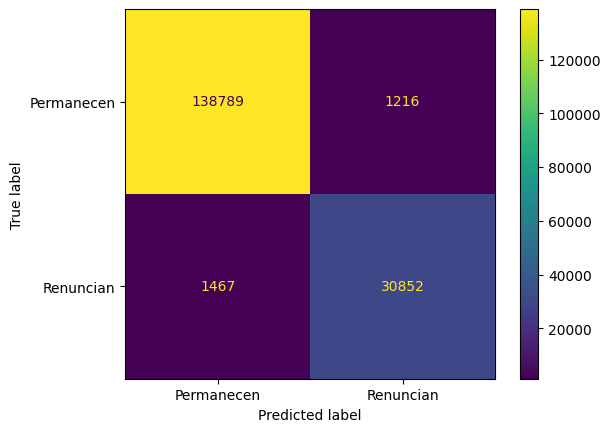

In [10]:
matriz_confusion=confusion_matrix(y_val,y_previsto_rf_bu)
matriz_confusion

visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

In [11]:
print(classification_report(y_val,y_previsto_rf_bu))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    140005
           1       0.96      0.95      0.96     32319

    accuracy                           0.98    172324
   macro avg       0.98      0.97      0.97    172324
weighted avg       0.98      0.98      0.98    172324



In [68]:
RF=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=5)
cv=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(RF,X_bal_under,y_bal_under,cv=cv,scoring='recall')
cv_resultados

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

{'fit_time': array([15.74390793,  9.27583003,  9.80831003, 10.53770041, 10.55139399]),
 'score_time': array([0.18876147, 0.34166551, 0.18684983, 0.18990088, 0.18732476]),
 'test_score': array([0.95266656, 0.9530931 , 0.95333045, 0.95680329, 0.95278265])}

###Regresión Logística

In [69]:
X_n=datos_norm.drop('CHURN',axis=1)
y_n=datos_norm['CHURN']

from sklearn.model_selection import train_test_split

X_ent_n,X_test_n,y_ent_n,y_test_n=train_test_split(X_n,y_n,test_size=0.2,random_state=5,stratify=y_n)
X_train_n,X_val_n,y_train_n,y_val_n=train_test_split(X_ent_n,y_ent_n,test_size=0.1,random_state=5,stratify=y_ent_n)

In [70]:
from sklearn.linear_model import LogisticRegression

modelo_RL=LogisticRegression(random_state=5)
modelo_RL.fit(X_train_n,y_train_n)
y_previsto_rl=modelo_RL.predict(X_val_n)


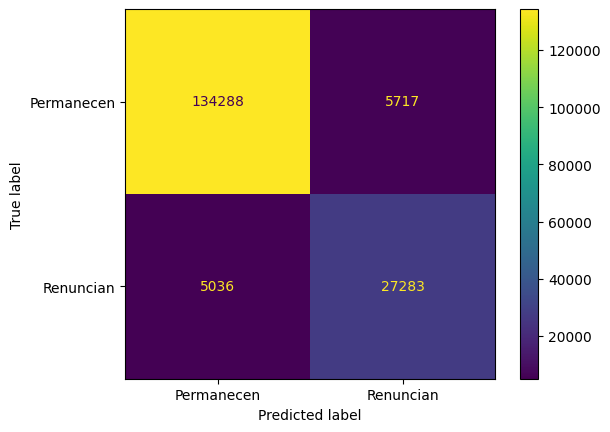

In [71]:
matriz_confusion=confusion_matrix(y_val_n,y_previsto_rl)
matriz_confusion

visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

In [72]:
print(classification_report(y_val,y_previsto_rl))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    140005
           1       0.83      0.84      0.84     32319

    accuracy                           0.94    172324
   macro avg       0.90      0.90      0.90    172324
weighted avg       0.94      0.94      0.94    172324



In [73]:
modelo_RLB=LogisticRegression(random_state=5,class_weight="balanced")
modelo_RLB.fit(X_train_n,y_train_n)
y_previsto_rlb=modelo_RLB.predict(X_val_n)

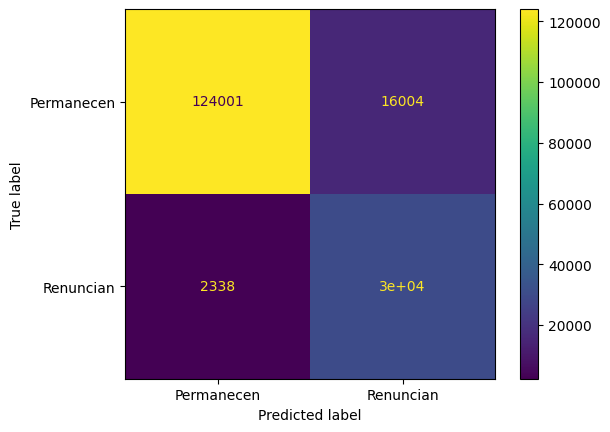

In [74]:
matriz_confusion=confusion_matrix(y_val_n,y_previsto_rlb)
matriz_confusion
visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

In [75]:
print(classification_report(y_val,y_previsto_rlb))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93    140005
           1       0.65      0.93      0.77     32319

    accuracy                           0.89    172324
   macro avg       0.82      0.91      0.85    172324
weighted avg       0.92      0.89      0.90    172324



###KNN


In [76]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn=KNeighborsClassifier()
modelo_knn.fit(X_train_n,y_train_n)
y_previsto_knn=modelo_knn.predict(X_val_n)

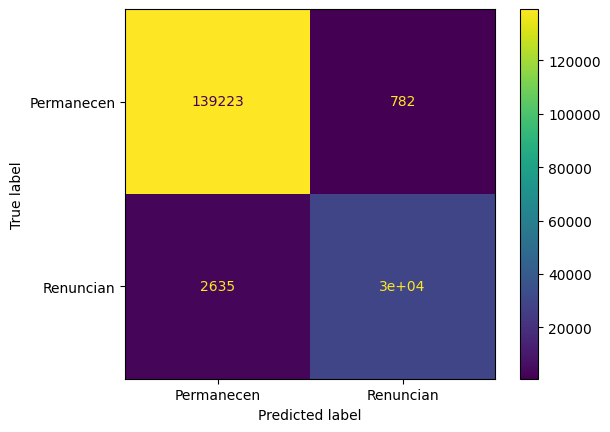

In [77]:
matriz_confusion=confusion_matrix(y_val_n,y_previsto_knn)
matriz_confusion
visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

In [78]:
print(classification_report(y_val,y_previsto_knn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    140005
           1       0.97      0.92      0.95     32319

    accuracy                           0.98    172324
   macro avg       0.98      0.96      0.97    172324
weighted avg       0.98      0.98      0.98    172324



#💪Champion

##Importancia

In [12]:
X_bal_under.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')

In [13]:
len(X_bal_under.columns)

13

In [14]:
modelo=modelo_RF_bu

In [15]:
#Importancai de variables en modelo random forest elegido  (Solo valores de X)
importancia_ch=modelo.feature_importances_
importancia_ch

array([2.55369234e-04, 7.22816202e-06, 3.59058318e-02, 8.48078836e-02,
       5.78425173e-02, 3.85036108e-02, 1.38575283e-01, 1.09531181e-03,
       6.38426830e-02, 1.60960313e-01, 2.10160942e-01, 1.49592175e-01,
       5.84508511e-02])

In [16]:
importancia_ch=pd.DataFrame({'Variables explicativas':X_bal_under.columns,'Importancia':(importancia_ch*100).round(2)}).sort_values(by='Importancia',ascending=False)
importancia_ch

,Variables explicativas,Importancia
10,TIGO,21.02
9,ORANGE,16.10
11,REGULARITY,14.96
6,FREQUENCE,13.86
3,FREQUENCE_RECH,8.48
8,ON_NET,6.38
12,FREQ_TOP_PACK,5.85
4,REVENUE,5.78
5,ARPU_SEGMENT,3.85
2,MONTANT,3.59


In [17]:
len(X_bal_under)

405997

In [20]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5, n_estimators=100)
ct_features=[i if i!=0 else 1 for i in range(0,13,3)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_bal_under[selected_features]
  X_test_sel = X_test[selected_features]
  modelo_champion_var.fit(X_train_sel, y_bal_under)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(y_test,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

,1,3,6,9,12
accuracy,0.99,0.99,0.99,0.99,0.99
recall,0.93,0.95,0.96,0.96,0.96
precision,0.99,0.97,0.97,0.98,0.98
f1,0.96,0.96,0.97,0.97,0.97


In [21]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5, n_estimators=100)
ct_features=[i if i!=0 else 1 for i in range(5,9)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_bal_under[selected_features]
  X_test_sel = X_test[selected_features]
  modelo_champion_var.fit(X_train_sel, y_bal_under)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(y_test,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

,5,6,7,8
accuracy,0.98,0.99,0.99,0.99
recall,0.96,0.96,0.96,0.96
precision,0.96,0.97,0.98,0.98
f1,0.96,0.97,0.97,0.97


In [22]:
#Df final quedaría con las siguientes columnas
selected_features = importancia_ch['Variables explicativas'].values[:6]
X_selected_features=X[selected_features]
X_selected_features.head()

,TIGO,ORANGE,REGULARITY,FREQUENCE,FREQUENCE_RECH,ON_NET
0,1.0,46.0,54.0,17.0,15.0,388.0
1,10.4,32.1,4.0,5.4,4.4,59.0
2,7.0,46.0,17.0,2.0,2.0,90.0
3,2.0,102.0,62.0,18.0,15.0,41.0
4,23.5,24.0,11.0,1.0,1.0,39.0


In [23]:
X_selected_features.columns

Index(['TIGO', 'ORANGE', 'REGULARITY', 'FREQUENCE', 'FREQUENCE_RECH',
       'ON_NET'],
      dtype='object')

In [24]:
len(X_selected_features)

2154048

In [25]:
datos_modelo=X_selected_features.copy()
datos_modelo

,TIGO,ORANGE,REGULARITY,FREQUENCE,FREQUENCE_RECH,ON_NET
0,1.0,46.0,54.0,17.0,15.0,388.0
1,10.4,32.1,4.0,5.4,4.4,59.0
2,7.0,46.0,17.0,2.0,2.0,90.0
3,2.0,102.0,62.0,18.0,15.0,41.0
4,23.5,24.0,11.0,1.0,1.0,39.0
...,...,...,...,...,...,...
2154043,23.5,98.1,6.0,14.5,11.9,289.7
2154044,40.0,40.0,55.0,15.0,15.0,26.0
2154045,10.4,32.1,1.0,5.4,4.4,59.0
2154046,13.0,140.0,28.0,13.0,11.0,0.0


##Cambia Nombres de columnas

In [26]:
datos_modelo = datos_modelo.rename(columns={'TIGO':'LLAMADAS_A_TIGO','ORANGE':'LLAMADAS_A_ORANGE','REGULARITY': 'NUM_RECARGAS_DEL_CLIENTE_90DIAS',
                                            'FREQUENCE': 'NUM_INGRESOS_DEL_CLIENTE', 'FREQUENCE_RECH': 'NUM_RECARGAS_DEL_CLIENTE','ON_NET':'LLAMADA_INTER_EXPRESO'})
datos_modelo

,LLAMADAS_A_TIGO,LLAMADAS_A_ORANGE,NUM_RECARGAS_DEL_CLIENTE_90DIAS,NUM_INGRESOS_DEL_CLIENTE,NUM_RECARGAS_DEL_CLIENTE,LLAMADA_INTER_EXPRESO
0,1.0,46.0,54.0,17.0,15.0,388.0
1,10.4,32.1,4.0,5.4,4.4,59.0
2,7.0,46.0,17.0,2.0,2.0,90.0
3,2.0,102.0,62.0,18.0,15.0,41.0
4,23.5,24.0,11.0,1.0,1.0,39.0
...,...,...,...,...,...,...
2154043,23.5,98.1,6.0,14.5,11.9,289.7
2154044,40.0,40.0,55.0,15.0,15.0,26.0
2154045,10.4,32.1,1.0,5.4,4.4,59.0
2154046,13.0,140.0,28.0,13.0,11.0,0.0


In [27]:
columnas_elegidas=datos_modelo.head()
columnas_elegidas.to_csv("Columnas_eligidas.csv", index=False)

In [28]:
for d in datos_modelo.columns:
  print(f'{d}={datos_modelo[d].nunique()} -->  min={datos_modelo[d].min()} -- max={datos_modelo[d].max()}')
 # print(f'min={datos_modelo[d].min()} -- max={datos_modelo[d].max()}')

LLAMADAS_A_TIGO=1317 -->  min=0.0 -- max=4174.0
LLAMADAS_A_ORANGE=3169 -->  min=0.0 -- max=21323.0
NUM_RECARGAS_DEL_CLIENTE_90DIAS=62 -->  min=1.0 -- max=62.0
NUM_INGRESOS_DEL_CLIENTE=93 -->  min=1.0 -- max=91.0
NUM_RECARGAS_DEL_CLIENTE=125 -->  min=1.0 -- max=133.0
LLAMADA_INTER_EXPRESO=9885 -->  min=0.0 -- max=50809.0


In [29]:
X_train_ch,X_test_ch,y_train_ch,y_test_ch=train_test_split(datos_modelo,y,test_size=0.2,random_state=5,stratify=y)

In [30]:
undersample=NearMiss(version=3)
X_bal_under_ch,y_bal_under_ch=undersample.fit_resample(X_train_ch,y_train_ch)

/usr/local/lib/python3.12/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [31]:
from sklearn.ensemble import RandomForestClassifier
modelo_ch=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=5)
modelo_ch.fit(X_bal_under_ch,y_bal_under_ch)
y_previsto_ch=modelo_ch.predict(X_test_ch)

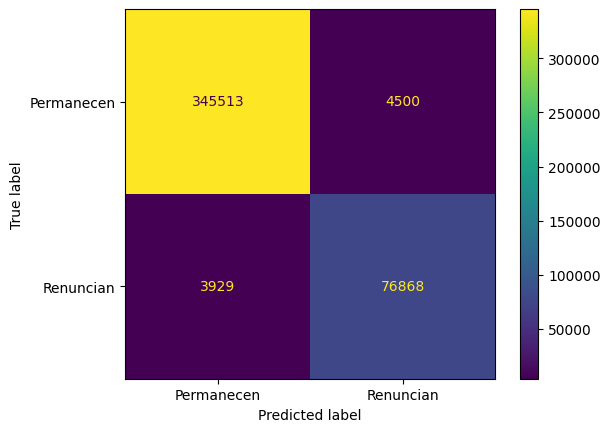

In [32]:
matriz_confusion=confusion_matrix(y_test_ch,y_previsto_ch)
matriz_confusion

visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

In [33]:
print(classification_report(y_test_ch,y_previsto_ch))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    350013
           1       0.94      0.95      0.95     80797

    accuracy                           0.98    430810
   macro avg       0.97      0.97      0.97    430810
weighted avg       0.98      0.98      0.98    430810



In [34]:
RF=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=5)
cv=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(RF,X_bal_under_ch,y_bal_under_ch,cv=cv,scoring='recall')
cv_resultados

{'fit_time': array([7.3448534 , 8.52892876, 8.39310312, 7.58006096, 8.69676375]),
 'score_time': array([0.19539523, 0.20493031, 0.31088114, 0.2004869 , 0.22160602]),
 'test_score': array([0.9513421 , 0.95062839, 0.95066619, 0.94997217, 0.95066049])}

##Guarda Modelo Champiom

In [35]:
import pickle

try:
  with open('modelo_champion.pkl','wb') as file:
    pickle.dump(modelo_ch,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Modelo serializado con éxito


##Prediccion

###Llama Modelo

In [36]:
import pickle

archivo = '/content/modelo_champion.pkl'


try:
    with open(archivo, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


###Datos de prueba

In [37]:
nuevo_dato = {
'LLAMADAS_A_TIGO':[1317]
,'LLAMADAS_A_ORANGE':[3169]
,'NUM_RECARGAS_DEL_CLIENTE_90DIAS':[30]
,'NUM_INGRESOS_DEL_CLIENTE':[50]
,'NUM_RECARGAS_DEL_CLIENTE':[100]
,'LLAMADA_INTER_EXPRESO':[9885]
}



In [38]:
df_nuevo_dato=pd.DataFrame(nuevo_dato)
df_nuevo_dato

,LLAMADAS_A_TIGO,LLAMADAS_A_ORANGE,NUM_RECARGAS_DEL_CLIENTE_90DIAS,NUM_INGRESOS_DEL_CLIENTE,NUM_RECARGAS_DEL_CLIENTE,LLAMADA_INTER_EXPRESO
0,1317,3169,30,50,100,9885


###Resultado

In [39]:
# Ejemplo de predicción con datos de entrada 'X'  Si da 0 el cliente permanece  y 1 renuncia
prediccion=int(model.predict(df_nuevo_dato)[0])
probabilidad=model.predict_proba(df_nuevo_dato)

if prediccion==0:
    print(f' El cliente va a permancecer en la compañia con un {round(probabilidad[0,0]*100,1)}% de certeza')
else:
    print(f' El cliente va a renunciar a la compañía con un {round(probabilidad[0,1]*100,1)}% de certeza')


 El cliente va a permancecer en la compañia con un 73.3% de certeza
